#Setup for dataset

In [1]:
## Setup the configuration for kaggle to access the dataset   for google colab to get images

import json
import os
from pathlib import Path

# Api key
api_key = {
'username':"zubairahmedshaik" ,
'key':"b9f8042bb02ca2eb3382b96b8f515e27"}

# creating .kaggel directory to dump above API in kaggle.json
kaggle_path = Path('/root/.kaggle')
os.makedirs(kaggle_path, exist_ok=True)

# Creating models directory to save models
models_path = Path('/content/models')
os.makedirs(models_path, exist_ok=True)

# opens file and dumps python dict to json object
with open (kaggle_path/'kaggle.json', 'w') as handl:
    json.dump(api_key,handl)

#Changing permissions of file
os.chmod(kaggle_path/'kaggle.json', 600)


In [2]:
## Downloading the kaggle dataset
!kaggle datasets download -d shahidulugvcse/national-flowers

 98% 197M/200M [00:05<00:00, 41.9MB/s]
100% 200M/200M [00:05<00:00, 38.3MB/s]


In [3]:
#Extracting the downloded data into content directory
import zipfile
zip_ref = zipfile.ZipFile('/content/national-flowers.zip')
zip_ref.extractall('/content/')
zip_ref.close()

#Modules used

In [4]:
#Importing required libraries

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras import layers
from keras import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, BatchNormalization, Dropout
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import PIL
import os
import numpy as np
import cv2
import pathlib
from sklearn.model_selection import train_test_split
import seaborn as sns
import random
#from tf.keras.models import load_model
from sklearn.metrics import accuracy_score

#Labeling output and collecting the images list

In [5]:
# setting up the data directory where images are present
data_dir = pathlib.Path('/content/flowerdataset/train')

#collecting all images into one dictionary
flower_images_dict = {
    'roses' : list(data_dir.glob('Rose/*')),
    'daisy' : list(data_dir.glob('Daisy/*')),
    'dandelion' : list(data_dir.glob('Dandelion/*')),
    'lavender': list(data_dir.glob('Lavender/*')),
    'lilly' : list(data_dir.glob('Lilly/*')),
    'lotus' : list(data_dir.glob('Lotus/*')),
    'orchid' : list(data_dir.glob('Orchid/*')),
    'sunflower' : list(data_dir.glob('Sunflower/*')),
    'tulip' : list(data_dir.glob('Tulip/*'))
}

#Assigning numbers to the labels
flower_images_labels = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'lavender': 3,
    'lilly' : 4,
    'lotus' : 5,
    'orchid' : 6,
    'sunflower' : 7,
    'tulip' : 8
}

#Vice-versa of labels to numbers
flower_images_num = {
    '0' : 'roses',
    '1' : 'daisy',
    '2' : 'dandelion',
    '3' : 'lavender',
    '4' : 'lilly',
    '5' : 'lotus',
    '6' : 'orchid',
    '7' : 'sunflower',
    '8' : 'tulip',
}

#Creating the dataset (Input, Output, Train and Test split) using images

In [6]:
#Creating a dataset by parsing all the images
X, y = [], []
for flowers_name, images in flower_images_dict.items():
    for image in images:
        #imread is used to open and read the image file
        img = cv2.imread(str(image))
        #converting the image size to 224*224
        resized_image = cv2.resize(img, (224, 224))
        #Appending the resized image data to list
        X.append(resized_image)
        #Appending respective label to list
        y.append(flower_images_labels[flowers_name])

#Converting the list dataset to numpy array
X = np.array(X)
y = np.array(y)

#Below lines of code is to shuffle the data to avoid overfitting
combine = list(zip(X, y))
random.shuffle(combine)
X, y = zip(*combine)
X = np.array(X) / 255
y = np.array(y)

#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)


#Model creation --Basic neural network

In [7]:
## Simple Neural network model
model_0 = Sequential([
    layers.Flatten(input_shape=(224, 224, 3)), #Input flatten layer
    layers.Dense(128, activation='relu'), #Hidden layer with 128 neurons
    layers.Dense(64, activation='relu'), #Hidden layer with 64 neurons
    layers.Dense(9, activation='softmax') #Output layer with 9
])

#Below line it to compile the model
model_0.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#Training the model with 250 iterations
history = model_0.fit(X_train, y_train, epochs=250, validation_data=(X_test, y_test), verbose = 0)

In [16]:
## Getting the performance of the model
m_p0 = model_0.evaluate(X_test, y_test)
print(f'Accuracy of Model_0 is : {round(m_p0[1] * 100, 2)} %')
print(f'Loss of Model_0 is : {round(m_p0[0], 2)}')

12/12 [==============================] - 0s 8ms/step - loss: 4.3772 - accuracy: 0.3722
Accuracy of Model_0 is : 37.22 %
Loss of Model_0 is : 4.38


#Extra Feature **1** -- BatchNormalization, CNN, Maxpooling to improve accuracy and avoid overfitting.

In [17]:
## CNN model with batch Normalization, Max pooling layers
model_1 = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'), #using 16 filters and kernel size of 3 *3,
    #padding --> same to keep output same as input image
    BatchNormalization(), #Adding a normalization model
    layers.MaxPool2D(), #Adding maxpool layer for down sampling
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPool2D(),
    layers.Flatten(), #Flatten layer
    layers.Dense(128, activation='relu'), #Hidden layer
    layers.Dense(9, activation='softmax') #output layer
])

#Below line it to compile the model
model_1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#Training the model with 30 iterations
history = model_1.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose = 0)

In [19]:
#Evaluation of the model
model_1_p = model_1.evaluate(X_test, y_test)
print(f'Accuracy of model_1_p is : {round(model_1_p[1] * 100, 2)} %')
print(f'Loss of model_1_p is : {round(model_1_p[0], 2)}')

12/12 [==============================] - 0s 16ms/step - loss: 3.1463 - accuracy: 0.5500
Accuracy of model_1_p is : 55.0 %
Loss of model_1_p is : 3.15


#Extra Feature **2**  --- Adding L2 regularization to model

In [20]:
## CNN model with regularization to avoid the overfitting
model_2 = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)), #Adding L2 regularization with alpha value of 0.01
    layers.Dense(9, activation='softmax')
])

#Compiling the model
model_2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
#Training the model
history_2 = model_2.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose = 0)

In [21]:
#Evaluating the performance of the model
model_2_p = model_2.evaluate(X_test, y_test)
print(f'Accuracy of model_2_p is : {round(model_2_p[1] * 100, 2)} %')
print(f'Loss of model_2_p is : {round(model_2_p[0], 2)}')

12/12 [==============================] - 0s 17ms/step - loss: 1.8078 - accuracy: 0.6083
Accuracy of model_2_p is : 60.83 %
Loss of model_2_p is : 1.81


#Model Visualization -- Summary of the model created.
 ##Model contains 3 set of convonutional, Normalization, Maxpooling layers.
 ##Then a Flatten layer, hidden layer and a output layer.

In [22]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 15.2 MB/s eta 0:00:00


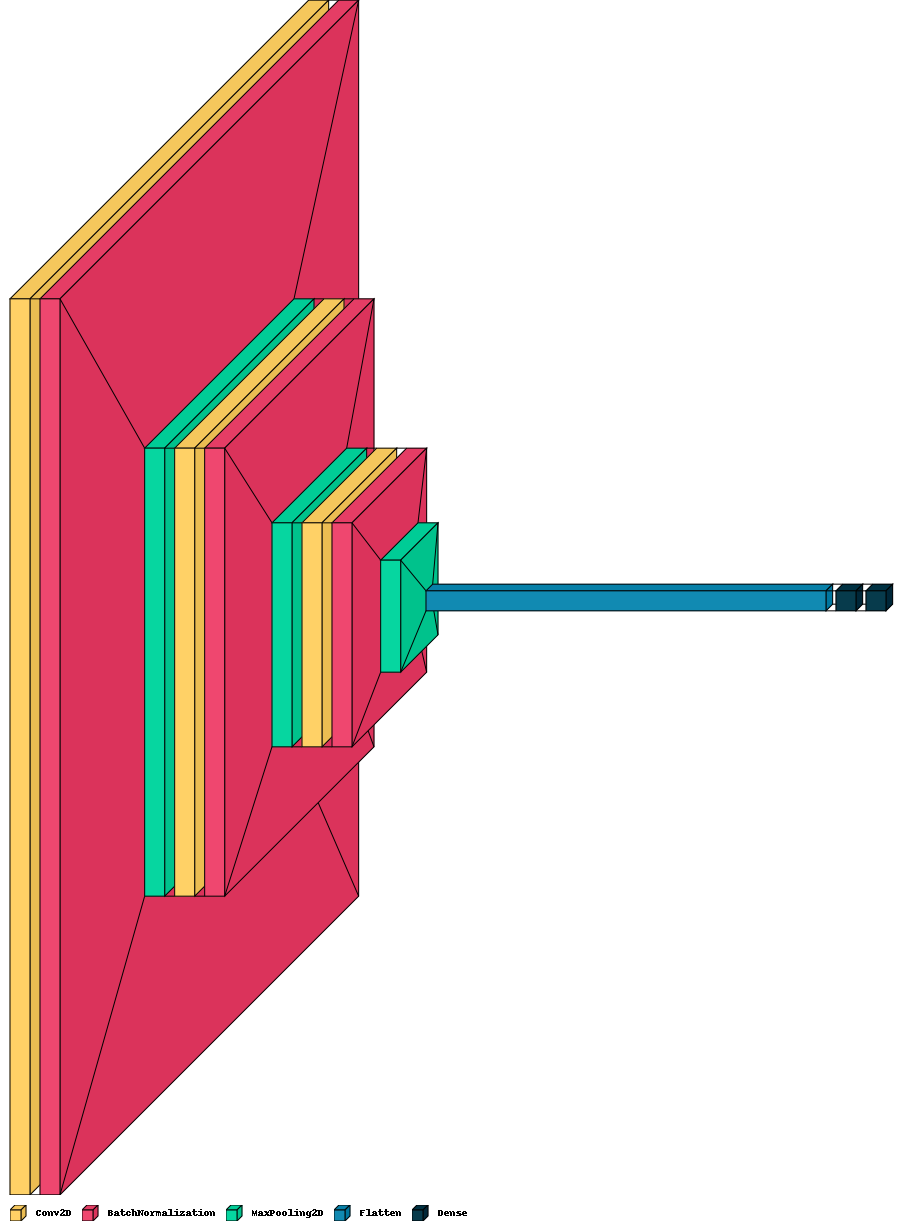

In [23]:
import visualkeras

#Below line is to view the neural network model
visualkeras.layered_view(model_2, legend=True) #Summarize about model

#Prediction using Model 2

In [27]:
#Predicting the X_test values using model 2
prediction_val = model_2.predict(X_test)

random_values = np.random.randint(0, 100, size=1)
pred_val = flower_images_num[str(np.argmax(prediction_val[random_values[0]]))]
actual_val = flower_images_num[str(y_test[random_values[0]])]
#Getting the actual and predicted value and printing
print(f'\nPredicted flower: {pred_val}, Actual Flower: {actual_val}')

12/12 [==============================] - 0s 15ms/step

Predicted flower: lavender, Actual Flower: lavender


#Extra Feature **3** --  Data Augmentation to improve performance and avoid overfitting.

In [28]:
#CNN with data augmentation to improve accuracy

#Creating data augmentation with flip, rotation and zoom techniques
data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(224, 224,3)),
    layers.experimental.preprocessing.RandomRotation(0.4), #0.4 times rotation
    layers.experimental.preprocessing.RandomZoom(0.2), #20% of zoom
])

#Adding data augmentation to cnn model
model_3 = Sequential([
    data_aug,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.1),
    layers.Dense(9, activation='softmax')
])

#Compiling the model
model_3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#Traing the model
history = model_3.fit(X_train, y_train, epochs=250, validation_data=(X_test, y_test), verbose = 0)

In [29]:
#Calculating the accuracy of model_3
model_3_p = model_3.evaluate(X_test, y_test)
print(f'Accuracy of model_3_p is : {round(model_3_p[1] * 100, 2)} %')
print(f'Loss of model_3_p is : {round(model_3_p[0], 2)}')

12/12 [==============================] - 0s 17ms/step - loss: 1.6687 - accuracy: 0.7194
Accuracy of model_3_p is : 71.94 %
Loss of model_3_p is : 1.67


#Extra Feature **4** --- Transfer learning using pretrained model

In [34]:
#Getting the labels list and converting it to numpy array
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

#Link for the pretrained model
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

#Getting the pretrained model,
#tainable = False to freezes the weights, preventing them from being updated during training
pretrained_model = hub.KerasLayer(feature_extractor_model, input_shape = (224, 224, 3), trainable=False)

#Creating new model using pre-trained model
model_p = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(9, activation='softmax')
])

#Compiling the model
model_p.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#Training the model
history_t = model_p.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)
#Saving the model
model_p.save('/content/models/model_p.keras')

Epoch 1/10
102/102 [==============================] - 9s 56ms/step - loss: 1.4934 - accuracy: 0.6065 - val_loss: 0.9846 - val_accuracy: 0.7889
Epoch 2/10
102/102 [==============================] - 4s 43ms/step - loss: 0.7850 - accuracy: 0.8380 - val_loss: 0.8028 - val_accuracy: 0.8250
Epoch 3/10
102/102 [==============================] - 4s 43ms/step - loss: 0.6224 - accuracy: 0.8855 - val_loss: 0.7255 - val_accuracy: 0.8278
Epoch 4/10
102/102 [==============================] - 4s 44ms/step - loss: 0.5353 - accuracy: 0.9052 - val_loss: 0.7054 - val_accuracy: 0.8306
Epoch 5/10
102/102 [==============================] - 4s 43ms/step - loss: 0.4795 - accuracy: 0.9185 - val_loss: 0.6880 - val_accuracy: 0.8278
Epoch 6/10
102/102 [==============================] - 4s 43ms/step - loss: 0.4448 - accuracy: 0.9284 - val_loss: 0.6496 - val_accuracy: 0.8361
Epoch 7/10
102/102 [==============================] - 4s 43ms/step - loss: 0.4070 - accuracy: 0.9410 - val_loss: 0.6475 - val_accuracy: 0.8361

In [35]:
#Evaluating the model
model_p_eval = model_p.evaluate(X_test, y_test)
print(f'Accuracy of model_p_eval is : {round(model_p_eval[1] * 100, 2)} %')
print(f'Loss of model_p_eval is : {round(model_p_eval[0], 2)}')

12/12 [==============================] - 1s 40ms/step - loss: 0.7366 - accuracy: 0.8083
Accuracy of model_p_eval is : 80.83 %
Loss of model_p_eval is : 0.74


#Plotting Accuracy and Loss graphs for Transfer learning model

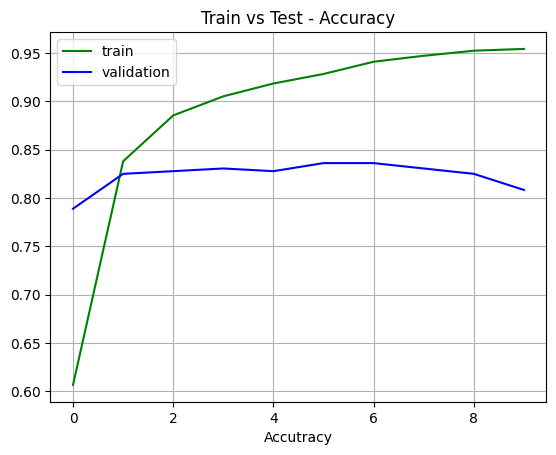

In [37]:
#Plotting the Train & Test Accuracy
plt.plot(history_t.history['accuracy'],color='green',label='train')
plt.plot(history_t.history['val_accuracy'],color='blue',label='validation')
plt.grid(True)
plt.xlabel('Accutracy')
plt.title('Train vs Test - Accuracy')
plt.legend()
plt.show()

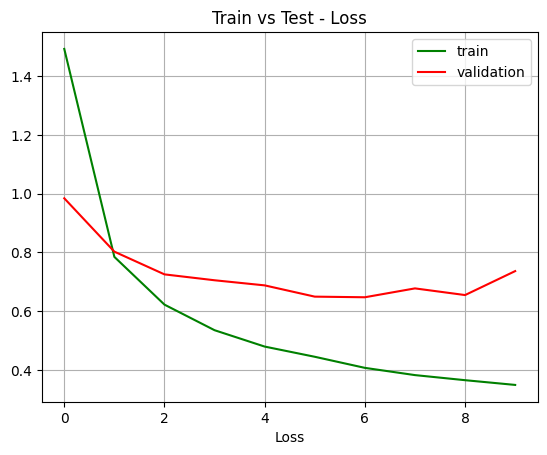

In [38]:
#Plotting Train vs Test Loss
plt.plot(history_t.history['loss'],color='green',label='train')
plt.plot(history_t.history['val_loss'],color='red',label='validation')
plt.grid(True)
plt.xlabel('Loss')
plt.title('Train vs Test - Loss')
plt.legend()
plt.show()

#Extra Feature **5** - confusion matrix and plotting fractional incorrect values for Transfer learning model.

12/12 [==============================] - 0s 39ms/step


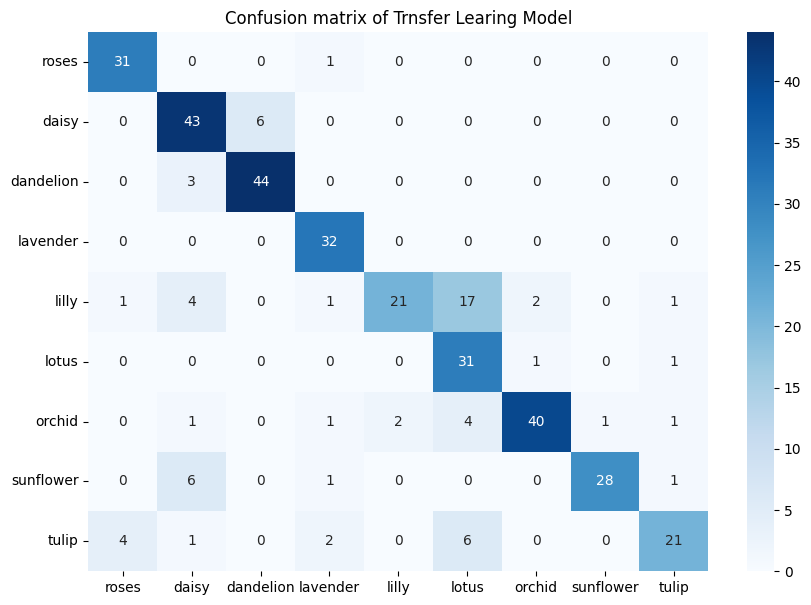

In [41]:
#Getting the confusion matrix out of Actual and predicted values
#pred_val_unique = list()
#for i in prediction_val:
    #prediction gives probabilities of 0-9, so using argmax to get highest value
#    pred_val_unique.append(np.argmax(i))
pred_val_unique = np.argmax(model_p.predict(X_test), axis=1)
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=pred_val_unique)
#Plotting the confusion matrix
plt.figure(figsize = (10,7))
plt.title('Confusion matrix of Trnsfer Learing Model')
s = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', xticklabels=flower_images_labels.keys(), yticklabels=flower_images_labels.keys())
plt.show()

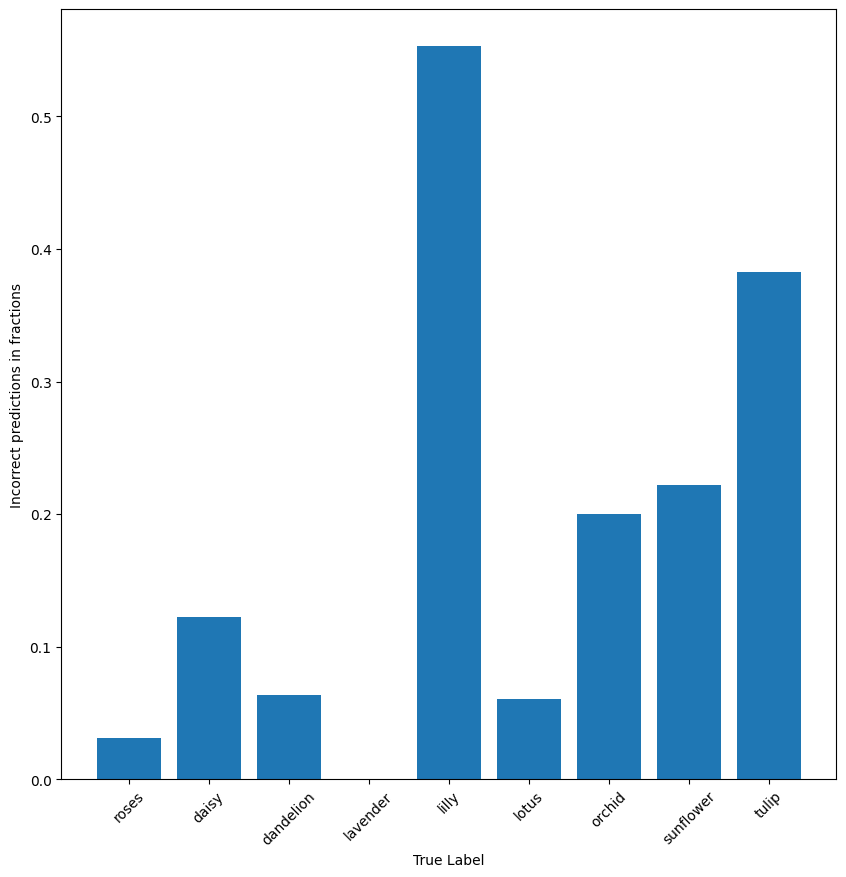

In [44]:
#Plotting incorrect misclassification graph
incorrect_fraction = 1 - np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(flower_images_labels.keys(), incorrect_fraction)
plt.xlabel('True Label')
plt.ylabel('Incorrect predictions in fractions')
plt.xticks(rotation=45)
plt.show()

#Extra Feature **6**  --- Custom method to take image and predict the label

In [45]:
#Custom method which takes image path and model for prediction
def custom_method(image_path, nn_model):
    img = cv2.imread(str(image_path)) #Reading the image
    resized_image = cv2.resize(img, (224, 224))
    x_test = np.array(resized_image) / 255 #Normalizing the image
    x_test_new = np.array([x_test])
    val = flower_images_num[str(np.argmax(nn_model.predict(x_test_new)))] #Predicting the image
    print(f'Predicted flower is : {val}')

#Change the path to try new prediction
test_path = r'/content/flowerdataset/test/Sunflower/014cddbeef.jpg'
custom_method(test_path, model_p)
#img = PIL.Image.open(test_path)
#img

1/1 [==============================] - 1s 747ms/step
Predicted flower is : sunflower


In [46]:
# Transfer learning model with more dense/hidden layers to check val accuracy improvement
model_p1 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.09),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.01),
    tf.keras.layers.Dense(9, activation='softmax')
])

#compiling the model
model_p1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#Training the model
history = model_p1.fit(X_train, y_train, epochs=10, verbose=1)
model_p1.save('/content/models/model_p1.keras')

Epoch 1/10
102/102 [==============================] - 7s 39ms/step - loss: 1.5087 - accuracy: 0.5201
Epoch 2/10
102/102 [==============================] - 4s 39ms/step - loss: 0.8104 - accuracy: 0.7753
Epoch 3/10
102/102 [==============================] - 4s 39ms/step - loss: 0.6157 - accuracy: 0.8269
Epoch 4/10
102/102 [==============================] - 4s 39ms/step - loss: 0.5130 - accuracy: 0.8633
Epoch 5/10
102/102 [==============================] - 4s 39ms/step - loss: 0.4119 - accuracy: 0.8951
Epoch 6/10
102/102 [==============================] - 4s 39ms/step - loss: 0.3694 - accuracy: 0.9127
Epoch 7/10
102/102 [==============================] - 4s 39ms/step - loss: 0.3189 - accuracy: 0.9296
Epoch 8/10
102/102 [==============================] - 4s 39ms/step - loss: 0.3034 - accuracy: 0.9364
Epoch 9/10
102/102 [==============================] - 4s 39ms/step - loss: 0.2603 - accuracy: 0.9491
Epoch 10/10
102/102 [==============================] - 4s 39ms/step - loss: 0.2399 - accura

In [48]:
#checking performance of model
model_p1_eval1 = model_p1.evaluate(X_test, y_test)
print(f'Accuracy of model_p1_eval1 is : {round(model_p1_eval1[1] * 100, 2)} %')
print(f'Loss of model_p1_eval1 is : {round(model_p1_eval1[0], 2)}')

12/12 [==============================] - 1s 41ms/step - loss: 0.6041 - accuracy: 0.8111
Accuracy of model_p1_eval1 is : 81.11 %
Loss of model_p1_eval1 is : 0.6


#Extra feature **7** -- Implementation of K-fold cross validation

In [7]:
## K fold  cross Validation technique

from sklearn.model_selection import KFold

#Getting the labels list and converting it to numpy array
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

#Link for the pretrained model
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

#Getting the pretrained model,
#tainable = False to freezes the weights, preventing them from being updated during training
pretrained_model = hub.KerasLayer(feature_extractor_model, input_shape = (224, 224, 3), trainable=False)

#method to create a model
def createModel():
    model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.09),
    #tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.003)),
    #layers.Dropout(0.05),
    tf.keras.layers.Dense(9, activation='softmax')
    ])

    #Compile the model
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    return model

10484/10484 [==============================] - 0s 0us/step


In [8]:
# Initialize KFold
k_folds = 3
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize lists to store results
accuracy_per_fold = []
loss_per_fold = []

# Loop through the folds
for fold_index, (train_indexes, test_indexes) in enumerate(kf.split(X, y), 1):
    print(f'\nTraining on Fold {fold_index}...\n')

    # Split the data into training and testing sets X_train, y_train
    X_train, X_test = X[train_indexes], X[test_indexes]
    y_train, y_test = y[train_indexes], y[test_indexes]

    # Create and compile the model
    model = createModel()

    # Train the model
    history_kf = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

    # Evaluate the model on the test set
    scores = model.evaluate(X_test, y_test, verbose=0)
    accuracy_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

# Print the results
for fold_index in range(1, k_folds + 1):
    print(f'\nResults for Fold {fold_index}:')
    print(f'\tAccuracy: {round(accuracy_per_fold[fold_index-1], 2)} %')
    print(f'\tLoss: {round(loss_per_fold[fold_index-1], 2)} ')


Training on Fold 1...

Epoch 1/10
75/75 [==============================] - 15s 101ms/step - loss: 1.3840 - accuracy: 0.5421 - val_loss: 0.7757 - val_accuracy: 0.7792
Epoch 2/10
75/75 [==============================] - 4s 55ms/step - loss: 0.6884 - accuracy: 0.8037 - val_loss: 0.6512 - val_accuracy: 0.8167
Epoch 3/10
75/75 [==============================] - 4s 55ms/step - loss: 0.5058 - accuracy: 0.8608 - val_loss: 0.6345 - val_accuracy: 0.8183
Epoch 4/10
75/75 [==============================] - 4s 55ms/step - loss: 0.4182 - accuracy: 0.8933 - val_loss: 0.5811 - val_accuracy: 0.8408
Epoch 5/10
75/75 [==============================] - 4s 55ms/step - loss: 0.3457 - accuracy: 0.9200 - val_loss: 0.5955 - val_accuracy: 0.8292
Epoch 6/10
75/75 [==============================] - 4s 55ms/step - loss: 0.3040 - accuracy: 0.9317 - val_loss: 0.5665 - val_accuracy: 0.8392
Epoch 7/10
75/75 [==============================] - 4s 56ms/step - loss: 0.2667 - accuracy: 0.9442 - val_loss: 0.5458 - val_accu

#Custom neural network

In [49]:
import numpy as np

# Abstract Base class to force child class implement required methods
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for input X
    def fw_propagation(self, input):
        raise NotImplementedError #Raise an exception if chid doesnt implement this method

    # computes dE/dX error for a given dE/dY and update weights to reduce error
    def bw_propagation(self, output_error, learning_rate):
        raise NotImplementedError #Raise an exception if chid doesnt implement this method

# inherit from base class Layer
class Activation_Layer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def fw_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    def bw_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error


# activation function and its derivative
def tanh(x):
    return np.tanh(x)

def tanh_dr(x):
    return 1-np.tanh(x)**2

# inherit from base class Layer
class FullyConnectedLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    # returns output for a given input
    def fw_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def bw_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)

        # update parameters
        self.weights =  self.weights - (learning_rate * weights_error)
        self.bias = self.bias - (learning_rate * output_error)
        return input_error

# inherit from base class Layer
class FlattenLayer(Layer):
    # returns the flattened input
    def fw_propagation(self, input_data):
        self.input = input_data
        self.output = input_data.flatten().reshape((1,-1))
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    def bw_propagation(self, output_error, learning_rate):
        return output_error.reshape(self.input.shape)

# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_dr(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

class neuralNetwork:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_pr = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_pr):
        self.loss = loss
        self.loss_pr = loss_pr

    # method for predicting output for input
    def predict(self, input_data):
        # sample dimension first
        sample_size = len(input_data)
        result = []

        # Looping network over all input data
        for i in range(sample_size):
            # performing forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.fw_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # performing forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.fw_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # performing backward propagation
                error = self.loss_pr(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.bw_propagation(error, learning_rate)

            # calculate average error of all samples
            err =  err/samples
            print(f'Epoch --> {i+1}/{epochs} == error={round(err, 5)}')

In [50]:
import numpy as np

from keras.datasets import fashion_mnist
from keras.utils import to_categorical

# load fashion MNIST from server
(x_train_c, y_train_c), (x_test_c, y_test_c) = fashion_mnist.load_data()

# reshaping train dataset
x_train_c = x_train_c.reshape(x_train_c.shape[0], 1, 28*28)
x_train_c = x_train_c.astype('float32')
#normalizing input dataset
x_train_c /= 255

#Coverting training target data into categorical data
y_train_c = to_categorical(y_train_c)

#Reshaping the test dataset
x_test_c = x_test_c.reshape(x_test_c.shape[0], 1, 28*28)
x_test_c = x_test_c.astype('float32')
#normalizing test dataset
x_test_c /= 255
#Coverting testing target data into categorical data
y_test_c = to_categorical(y_test_c)

# Creating class of network
network = neuralNetwork()
#Adding fullyconnected and activation layers to network
network.add(FullyConnectedLayer(28*28, 100))                # input_shape=(1, 28*28)    ;   output_shape=(1, 100)
network.add(Activation_Layer(tanh, tanh_dr))
network.add(FullyConnectedLayer(100, 50))                   # input_shape=(1, 100)      ;   output_shape=(1, 50)
network.add(Activation_Layer(tanh, tanh_dr))
network.add(FullyConnectedLayer(50, 10))                    # input_shape=(1, 50)       ;   output_shape=(1, 10)
network.add(Activation_Layer(tanh, tanh_dr))

# 1000 samples are used for training
network.use(mse, mse_dr) #calculating errors
#Training the model
network.fit(x_train_c[0:1000], y_train_c[0:1000], epochs=35, learning_rate=0.1)


4422102/4422102 [==============================] - 0s 0us/step
Epoch --> 1/35 == error=0.19177
Epoch --> 2/35 == error=0.10045
Epoch --> 3/35 == error=0.08204
Epoch --> 4/35 == error=0.07176
Epoch --> 5/35 == error=0.06568
Epoch --> 6/35 == error=0.0611
Epoch --> 7/35 == error=0.05772
Epoch --> 8/35 == error=0.05515
Epoch --> 9/35 == error=0.05265
Epoch --> 10/35 == error=0.05039
Epoch --> 11/35 == error=0.04822
Epoch --> 12/35 == error=0.04623
Epoch --> 13/35 == error=0.04462
Epoch --> 14/35 == error=0.04307
Epoch --> 15/35 == error=0.04185
Epoch --> 16/35 == error=0.04072
Epoch --> 17/35 == error=0.03958
Epoch --> 18/35 == error=0.03811
Epoch --> 19/35 == error=0.03696
Epoch --> 20/35 == error=0.03594
Epoch --> 21/35 == error=0.03454
Epoch --> 22/35 == error=0.03318
Epoch --> 23/35 == error=0.03183
Epoch --> 24/35 == error=0.03077
Epoch --> 25/35 == error=0.02968
Epoch --> 26/35 == error=0.02862
Epoch --> 27/35 == error=0.02824
Epoch --> 28/35 == error=0.02721
Epoch --> 29/35 == erro

In [51]:
from sklearn.metrics import accuracy_score
#items = "T-shirt/top Trouser Pullover Dress Coat Sandal Shirt Sneaker Bag Ankle boot"
#items = items.split(' ')

#class labes list
items = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle', 'boot']

out = network.predict(x_test_c)

#Checking accuracy of custom model
out_t = np.array(out).reshape(10000, 10) #reshaping out array
accuracy = accuracy_score(np.argmax(y_test_c, axis=1), np.argmax(out_t, axis=1))
print(f'Accuracy of custom neural network model is : {round(accuracy * 100, 2)} %\n')

#Precicting the values by taking some random values
random_values = np.random.randint(0, 1000, size=5)
#Checking for some sample predictions
for index_val in random_values:
    print(f'index_val : {index_val}')
    print(f"predicted values : {items[np.argmax(out[index_val])]}")
    print(f"true values : {items[np.argmax(y_test_c[index_val])]}")
    print('-' * 100)

Accuracy of custom neural network model is : 70.34 %

index_val : 677
predicted values : T-shirt/top
true values : T-shirt/top
----------------------------------------------------------------------------------------------------
index_val : 748
predicted values : Bag
true values : Bag
----------------------------------------------------------------------------------------------------
index_val : 608
predicted values : Shirt
true values : Pullover
----------------------------------------------------------------------------------------------------
index_val : 246
predicted values : Shirt
true values : Shirt
----------------------------------------------------------------------------------------------------
index_val : 551
predicted values : Trouser
true values : Trouser
----------------------------------------------------------------------------------------------------


#Transfer learning models for ensemble techinique

In [52]:
#Getting the labels list and converting it to numpy array
#labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
#imagenet_labels = np.array(open(labels_path).read().splitlines())

#Link for the pretrained model
#feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

#Getting the pretrained model,
#tainable = False to freezes the weights, preventing them from being updated during training
#pretrained_model_ens1 = hub.KerasLayer(feature_extractor_model, input_shape = (224, 224, 3), trainable=False)

#Creating new model using pre-trained model with extra dense layer for ensemble technique
model_p2 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

#Compiling the model
model_p2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#Training the model
history_ens2 = model_p2.fit(X_train, y_train, epochs=10, verbose=0)
model_p2.save('/content/models/model_p2.keras')

In [53]:
#Creating new model using pre-trained model with extra dense and dropout layers for ensemble technique
model_p3 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.09),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(9, activation='softmax')
])

#Compiling the model
model_p3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#Training the model
history_ens3 = model_p3.fit(X_train, y_train, epochs=10, verbose=0)
model_p3.save('/content/models/model_p3.keras')

#Extra Feature **8** - Implement ensemble algorithm

In [54]:
from sklearn.metrics import classification_report as creport
#Loading the saved models
#model_load_1 = tf.keras.models.load_model('/content/models/model_p.keras')
#model_load_2 = load_model('/content/models/model_p2.keras')
#model_load_3 = load_model('/content/models/model_p3.keras')

#Creating the of models loaded
models_list = [model_p, model_p2, model_p3]

#Looping models and predicting based on that model.
preds = [model_loaded.predict(X_test) for model_loaded in models_list]

#Converting the preds to numpy array
preds = np.array(preds)

#Adding up all the predictions
summed = np.sum(preds, axis=0)

#Argmax across the classes
ensemble_prediction = np.argmax(summed, axis=1)

#Predicting with individual models
prediction1 = np.argmax(model_p.predict(X_test), axis=1)
prediction2 = np.argmax(model_p2.predict(X_test), axis=1)
prediction3 = np.argmax(model_p3.predict(X_test), axis=1)

#Getting accuracy scores
#accuracy1 = round(creport(y_test, prediction1, output_dict=True, labels=list(flower_images_labels.values()), target_names=list(flower_images_labels.keys()))['accuracy'] * 100 , 2)
accuracy1 = round(accuracy_score(y_test, prediction1) * 100 , 2)
accuracy2 = round(accuracy_score(y_test, prediction2) * 100, 2)
accuracy3 = round(accuracy_score(y_test, prediction3) * 100, 2)
ensemble_accuracy = round(accuracy_score(y_test, ensemble_prediction) * 100, 2)
temp_list = ['model1', 'model2', 'model3', 'ensemble']
accuracy_list = [accuracy1, accuracy2, accuracy3, ensemble_accuracy]
i = 0
for accu in accuracy_list:
    print(f'Accuracy score for {temp_list[i]} is : {accu} %')
    i+=1

12/12 [==============================] - 0s 35ms/step
Accuracy score for model1 is : 80.83 %
Accuracy score for model2 is : 84.72 %
Accuracy score for model3 is : 83.33 %
Accuracy score for ensemble is : 84.44 %


#Plot the accuracy of each model transfer learning model and ensemble model.

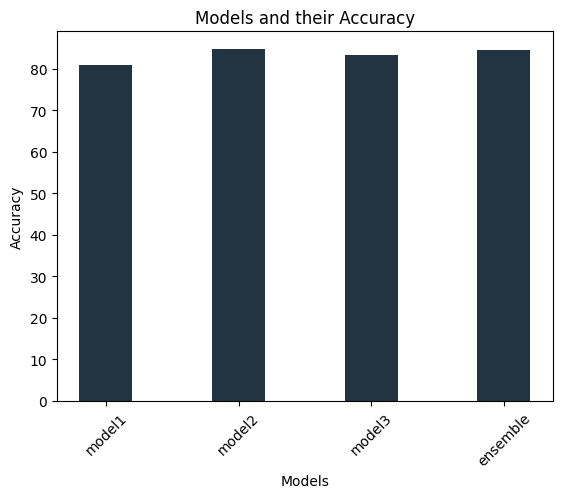

In [55]:
colors = ['red', 'blue', 'green', 'orange']
# Creating the bar plot
plt.bar(temp_list, accuracy_list, color='#223341', width=0.4)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Models and their Accuracy")

# Customizing xticks with rotation
plt.xticks(rotation=45)

plt.show()

#Extra Feature **9**  -- Functional way of implementation -- Non linear

In [12]:
from keras.utils import plot_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate
from tensorflow.keras.models import Model


# Define the input layer
input_layer = Input(shape=(224, 224, 3))

# Convolutional layers
conv1 = Conv2D(16, 3, activation='relu')(input_layer)
maxpool1 = MaxPooling2D((2, 2))(conv1)

conv2 = Conv2D(64, 3, activation='relu')(maxpool1)
maxpool2 = MaxPooling2D((2, 2))(conv2)

# Flatten layer to transition from convolutional to fully connected layers
flatten = Flatten()(maxpool2)

# Fully connected layers
dense1 = Dense(32, activation='relu')(flatten)
dense2 = Dense(32, activation='relu')(flatten)

# Concatenate the two branches
merged = concatenate([dense1, dense2])

dense3 = Dense(64, activation='relu')(merged)

output_layer = Dense(10, activation='softmax')(dense3)

# Create the model
model_fun = Model(inputs=input_layer, outputs=output_layer)

# Display the model summary
#model_fun.summary()

#Below line it to compile the model
model_fun.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [13]:
#Training the model with 20 iterations
history_fun = model_fun.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose = 0)

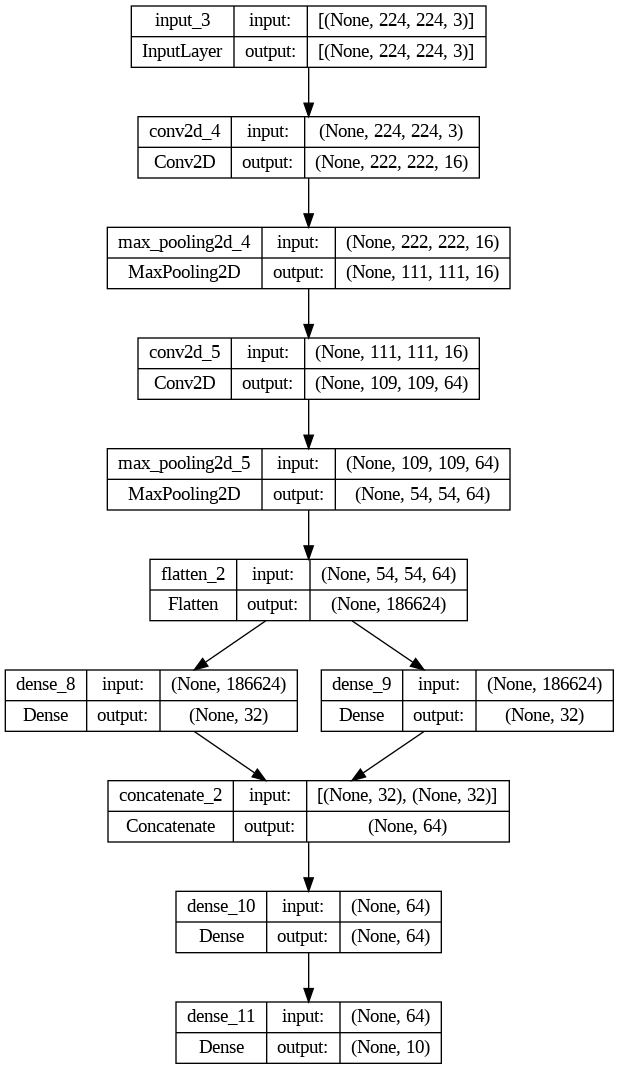

In [14]:
#Plotting the nonlinear model
#Model contains multiple layers of conv and maxpooling ten the flatten layer is connected to two parallel hidden (dense) layers (32 neurons)and the parallel layers are concatenated 
#and connted to hidden(hidde) layer(32 neurons) then connected to output layer(10 neurons)
plot_model(model_fun, show_shapes=True, show_layer_names=True)